<a href="https://colab.research.google.com/github/saliiimm/student-exam-dataset-preprocessing/blob/main/Student_exams_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Modules and Libraries

In [1]:
#of course we start with importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

# Load and read dataset

In [2]:
#importing the dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("desalegngeb/students-exam-scores")

print("Path to dataset files:", path)

100%|██████████| 695k/695k [00:00<00:00, 37.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/desalegngeb/students-exam-scores/versions/2


In [3]:
#reading the dataset
df = pd.read_csv('/root/.cache/kagglehub/datasets/desalegngeb/students-exam-scores/versions/2/Expanded_data_with_more_features.csv')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Exploratory data analysis

In [4]:
#lets see what column we have with num of values and the types of each col
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [6]:
#lets see if we have missing values
df.isnull().sum()

,0
Unnamed: 0,0
Gender,0
EthnicGroup,1840
ParentEduc,1845
LunchType,0
TestPrep,1830
ParentMaritalStatus,1190
PracticeSport,631
IsFirstChild,904
NrSiblings,1572


In [7]:
#lets check a sample to have an idea
df.sample(10)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
4927,190,male,group D,high school,free/reduced,completed,single,sometimes,yes,2.0,private,5 - 10,45,43,39
3834,46,female,group C,some college,standard,completed,married,sometimes,no,2.0,NaN,< 5,71,83,84
25525,212,male,group B,some college,free/reduced,completed,single,regularly,no,1.0,private,> 10,67,73,74
9903,474,male,group C,some high school,free/reduced,none,married,sometimes,no,6.0,NaN,5 - 10,43,37,32
2451,587,male,group C,some high school,free/reduced,completed,divorced,regularly,yes,4.0,school_bus,< 5,81,79,80
30071,448,female,group B,NaN,standard,none,married,sometimes,no,3.0,NaN,< 5,52,58,58
25192,862,male,group B,NaN,free/reduced,none,married,sometimes,yes,1.0,school_bus,5 - 10,44,44,45
15395,343,female,group C,some high school,free/reduced,none,married,regularly,yes,4.0,private,< 5,45,59,62
4480,728,male,group B,associate's degree,standard,none,divorced,regularly,yes,1.0,school_bus,5 - 10,81,79,82
21053,412,male,NaN,some college,standard,none,divorced,sometimes,yes,1.0,private,> 10,71,68,60


In [8]:
#lets see the possible values of each categorical col
for col in df:
  if df[col].dtype == object:
     print(col , df[col].unique())

Gender ['female' 'male']
EthnicGroup [nan 'group C' 'group B' 'group A' 'group D' 'group E']
ParentEduc ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school' nan]
LunchType ['standard' 'free/reduced']
TestPrep ['none' nan 'completed']
ParentMaritalStatus ['married' 'single' 'widowed' nan 'divorced']
PracticeSport ['regularly' 'sometimes' 'never' nan]
IsFirstChild ['yes' 'no' nan]
TransportMeans ['school_bus' nan 'private']
WklyStudyHours ['< 5' '5 - 10' '> 10' nan]


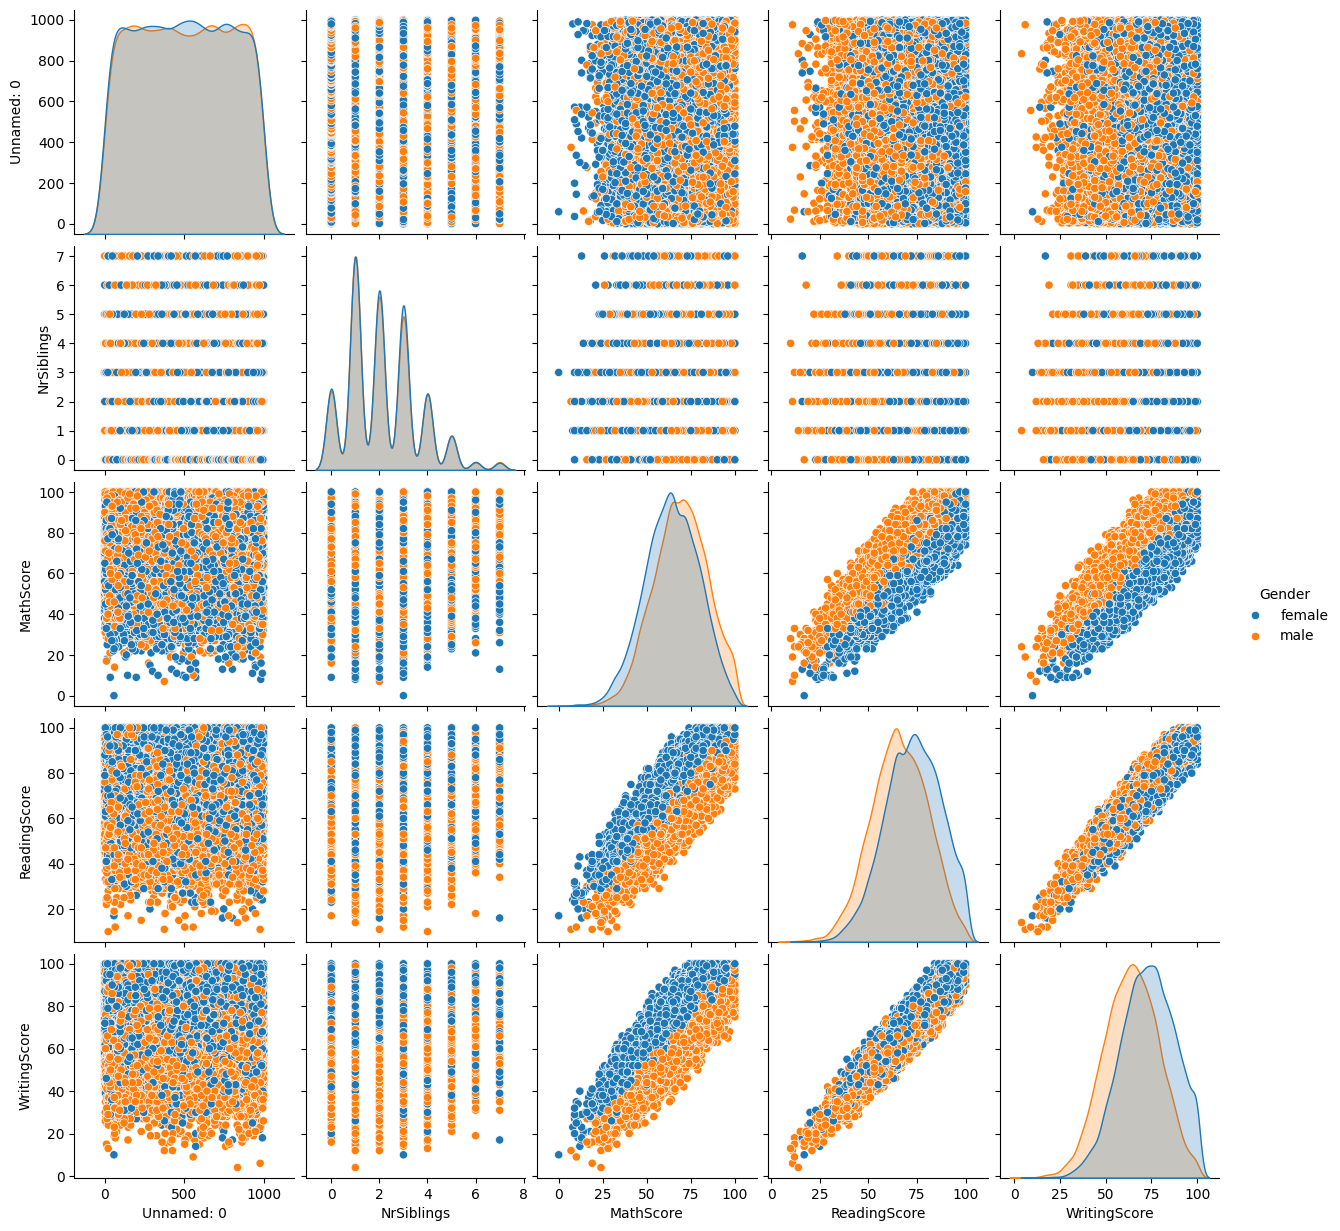

In [9]:
#maybe check if gender affects the data
sea.pairplot(df,hue = 'Gender')

<Axes: xlabel='Gender', ylabel='MathScore'>

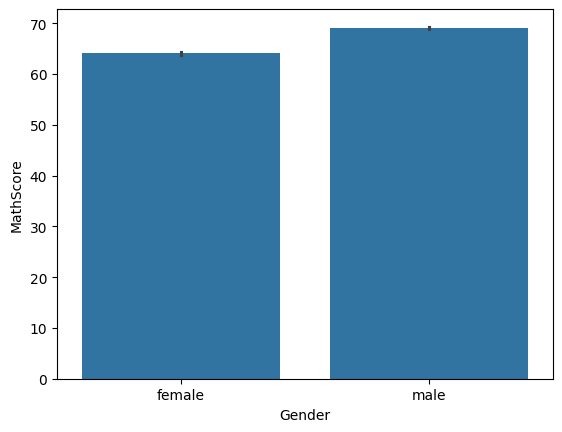

In [10]:
sea.barplot(x = 'Gender',y = 'MathScore',data = df)

<Axes: xlabel='EthnicGroup', ylabel='MathScore'>

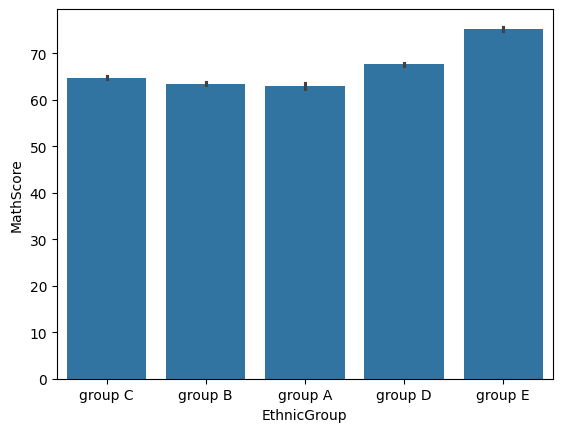

In [11]:
sea.barplot(x = 'EthnicGroup',y = 'MathScore',data = df)

<Axes: xlabel='TransportMeans', ylabel='WritingScore'>

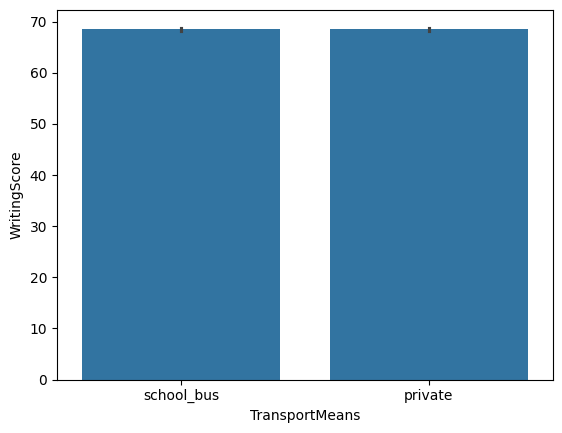

In [12]:
sea.barplot(x = 'TransportMeans',y = 'WritingScore',data = df)

<Axes: xlabel='WklyStudyHours', ylabel='MathScore'>

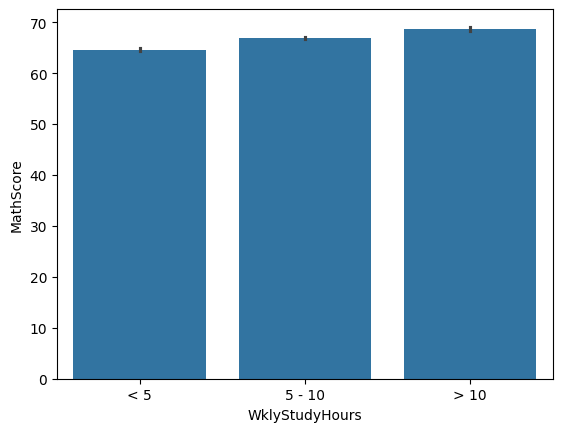

In [13]:
sea.barplot(x = 'WklyStudyHours',y = 'MathScore',data = df)

# Handling missing values

In [14]:
#forst we removed unamed:0 because it has no sense or effect on our dataset
df = df.drop(columns = ['Unnamed: 0'])
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [15]:
#lets see the percentage of each col missing values to see : if high we prioritize replacement rather than removing
missing_percentage = df.isnull().sum() / len(df) * 100
print(missing_percentage)

Gender                  0.000000
EthnicGroup             6.005026
ParentEduc              6.021344
LunchType               0.000000
TestPrep                5.972390
ParentMaritalStatus     3.883685
PracticeSport           2.059332
IsFirstChild            2.950295
NrSiblings              5.130381
TransportMeans         10.228126
WklyStudyHours          3.116739
MathScore               0.000000
ReadingScore            0.000000
WritingScore            0.000000
dtype: float64


In [16]:
df.shape

(30641, 14)

In [17]:
df = df.dropna(subset=['EthnicGroup','ParentEduc','TestPrep','TransportMeans','WklyStudyHours','PracticeSport','IsFirstChild','NrSiblings','ParentMaritalStatus'])
df.shape
#after removing the num of rows we see that we still have enough rows for training and testing!

(19243, 14)

In [18]:
#verifiying we dont have any null or Nan value left
df.isnull().sum()

,0
Gender,0
EthnicGroup,0
ParentEduc,0
LunchType,0
TestPrep,0
ParentMaritalStatus,0
PracticeSport,0
IsFirstChild,0
NrSiblings,0
TransportMeans,0


# Categorical values encoding

In [19]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39


In [22]:
#first we handle cases where we need oneHotEncoder
#i found out that it should be used with Gender,EthnicGroup,parent status,and transport means,
#because there is no hierarchical order between the values,so no need to use Ordinal or Label and one hot is the best one in
#theses cases
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False).set_output(transform = 'pandas')
#for genders
gender_transformed = ohe.fit_transform(df[['Gender']])
gender_transformed

,Gender_female,Gender_male
2,1.0,0.0
4,0.0,1.0
5,1.0,0.0
6,1.0,0.0
7,0.0,1.0
...,...,...
30635,0.0,1.0
30636,1.0,0.0
30637,0.0,1.0
30639,1.0,0.0


In [24]:
gender_encoded_df = pd.concat([df,gender_transformed],axis = 1).drop(columns = ['Gender'])
gender_encoded_df

,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male
2,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,1.0,0.0
4,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,0.0,1.0
5,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79,1.0,0.0
6,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89,1.0,0.0
7,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30635,group C,some college,standard,none,married,regularly,no,2.0,school_bus,5 - 10,58,53,49,0.0,1.0
30636,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,1.0,0.0
30637,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51,0.0,1.0
30639,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,1.0,0.0


In [25]:
df = gender_encoded_df
df.head()

,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male
2,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,1.0,0.0
4,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,0.0,1.0
5,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79,1.0,0.0
6,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89,1.0,0.0
7,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39,0.0,1.0


In [26]:
#for ethnicities
ethnic_transformed = ohe.fit_transform(df[['EthnicGroup']])
ethnic_transformed

,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E
2,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
30635,0.0,0.0,1.0,0.0,0.0
30636,0.0,0.0,0.0,1.0,0.0
30637,0.0,0.0,0.0,0.0,1.0
30639,0.0,0.0,0.0,1.0,0.0


In [27]:
df = pd.concat([df,ethnic_transformed],axis = 1).drop(columns = ['EthnicGroup'])
df

,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E
2,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30635,some college,standard,none,married,regularly,no,2.0,school_bus,5 - 10,58,53,49,0.0,1.0,0.0,0.0,1.0,0.0,0.0
30636,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,1.0,0.0,0.0,0.0,0.0,1.0,0.0
30637,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51,0.0,1.0,0.0,0.0,0.0,0.0,1.0
30639,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
#for parent status
parent_status_transformed = ohe.fit_transform(df[['ParentMaritalStatus']])
parent_status_transformed

,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed
2,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0
...,...,...,...,...
30635,0.0,1.0,0.0,0.0
30636,0.0,0.0,1.0,0.0
30637,0.0,0.0,1.0,0.0
30639,0.0,1.0,0.0,0.0


In [29]:
df = pd.concat([df,parent_status_transformed],axis = 1).drop(columns = ['ParentMaritalStatus'])
df

,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,...,Gender_male,EthnicGroup_group A,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed
2,master's degree,standard,none,sometimes,yes,4.0,school_bus,< 5,87,93,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,some college,standard,none,sometimes,yes,0.0,school_bus,5 - 10,76,78,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5,associate's degree,standard,none,regularly,yes,1.0,school_bus,5 - 10,73,84,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,some college,standard,completed,never,no,1.0,private,5 - 10,85,93,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,some college,free/reduced,none,sometimes,yes,1.0,private,> 10,41,43,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30635,some college,standard,none,regularly,no,2.0,school_bus,5 - 10,58,53,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
30636,high school,standard,none,sometimes,no,2.0,school_bus,5 - 10,59,61,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
30637,high school,standard,none,regularly,no,1.0,private,5 - 10,58,53,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
30639,associate's degree,standard,completed,regularly,no,3.0,school_bus,5 - 10,82,90,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [30]:
#for transport
transport_transformed = ohe.fit_transform(df[['TransportMeans']])
transport_transformed

,TransportMeans_private,TransportMeans_school_bus
2,0.0,1.0
4,0.0,1.0
5,0.0,1.0
6,1.0,0.0
7,1.0,0.0
...,...,...
30635,0.0,1.0
30636,0.0,1.0
30637,1.0,0.0
30639,0.0,1.0


In [31]:
df = pd.concat([df,transport_transformed],axis = 1).drop(columns = ['TransportMeans'])
df

,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,...,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,TransportMeans_private,TransportMeans_school_bus
2,master's degree,standard,none,sometimes,yes,4.0,< 5,87,93,91,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,some college,standard,none,sometimes,yes,0.0,5 - 10,76,78,75,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,associate's degree,standard,none,regularly,yes,1.0,5 - 10,73,84,79,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,some college,standard,completed,never,no,1.0,5 - 10,85,93,89,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,some college,free/reduced,none,sometimes,yes,1.0,> 10,41,43,39,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30635,some college,standard,none,regularly,no,2.0,5 - 10,58,53,49,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
30636,high school,standard,none,sometimes,no,2.0,5 - 10,59,61,65,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
30637,high school,standard,none,regularly,no,1.0,5 - 10,58,53,51,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
30639,associate's degree,standard,completed,regularly,no,3.0,5 - 10,82,90,93,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [32]:
#then we handle cases where we need OrdinalEncoder
#i found out that it should be used with parent education,working hours,and practice sport,
#because there is hierarchical order between the values an ordinal encoding is the most preferable in
#theses cases
from sklearn.preprocessing import OrdinalEncoder

In [33]:
#start with parents educ
df['ParentEduc'].unique()

array(["master's degree", 'some college', "associate's degree",
       'high school', 'some high school', "bachelor's degree"],
      dtype=object)

In [34]:
parent_educ_arr = [ 'some high school','high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

In [36]:
educ_oe = OrdinalEncoder(categories = [parent_educ_arr])
df['ParentEduc'] = educ_oe.fit_transform(df[['ParentEduc']])
df.head()

,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,...,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,TransportMeans_private,TransportMeans_school_bus
2,5.0,standard,none,sometimes,yes,4.0,< 5,87,93,91,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2.0,standard,none,sometimes,yes,0.0,5 - 10,76,78,75,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,3.0,standard,none,regularly,yes,1.0,5 - 10,73,84,79,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,2.0,standard,completed,never,no,1.0,5 - 10,85,93,89,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,2.0,free/reduced,none,sometimes,yes,1.0,> 10,41,43,39,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [37]:
#then with sport
df['PracticeSport'].unique()

array(['sometimes', 'regularly', 'never'], dtype=object)

In [39]:
sport_oe = OrdinalEncoder(categories = [['never', 'sometimes','regularly']])
df['PracticeSport'] = sport_oe.fit_transform(df[['PracticeSport']])
df.head()

,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,...,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,TransportMeans_private,TransportMeans_school_bus
2,5.0,standard,none,1.0,yes,4.0,< 5,87,93,91,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2.0,standard,none,1.0,yes,0.0,5 - 10,76,78,75,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,3.0,standard,none,2.0,yes,1.0,5 - 10,73,84,79,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,2.0,standard,completed,0.0,no,1.0,5 - 10,85,93,89,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,2.0,free/reduced,none,1.0,yes,1.0,> 10,41,43,39,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [40]:
#finally with study hours
df['WklyStudyHours'].unique()

array(['< 5', '5 - 10', '> 10'], dtype=object)

In [41]:
hours_work_oe = OrdinalEncoder(categories = [['< 5', '5 - 10', '> 10']])
df['WklyStudyHours'] = hours_work_oe.fit_transform(df[['WklyStudyHours']])
df.head()

,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,...,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,TransportMeans_private,TransportMeans_school_bus
2,5.0,standard,none,1.0,yes,4.0,0.0,87,93,91,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2.0,standard,none,1.0,yes,0.0,1.0,76,78,75,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,3.0,standard,none,2.0,yes,1.0,1.0,73,84,79,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,2.0,standard,completed,0.0,no,1.0,1.0,85,93,89,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,2.0,free/reduced,none,1.0,yes,1.0,2.0,41,43,39,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [42]:
#lastly we do label encoding on lunchTYpe TestPrep because they are binary values
#and we have one value better than the other,so we can represent the good one with 1,and
#the one which is a little worse with 0
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()
#for lunchType
df['LunchType'] = le.fit_transform(df['LunchType'])
df.head()

,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,...,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,TransportMeans_private,TransportMeans_school_bus
2,5.0,1,none,1.0,yes,4.0,0.0,87,93,91,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2.0,1,none,1.0,yes,0.0,1.0,76,78,75,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,3.0,1,none,2.0,yes,1.0,1.0,73,84,79,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,2.0,1,completed,0.0,no,1.0,1.0,85,93,89,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,2.0,0,none,1.0,yes,1.0,2.0,41,43,39,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [47]:
#for TestPrep
df['TestPrep'] = le.fit_transform(df['TestPrep'])
df['TestPrep'] = df['TestPrep'].replace({0: 1, 1: 0})
df.head()

,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,...,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,TransportMeans_private,TransportMeans_school_bus
2,5.0,1,0,1.0,yes,4.0,0.0,87,93,91,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2.0,1,0,1.0,yes,0.0,1.0,76,78,75,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,3.0,1,0,2.0,yes,1.0,1.0,73,84,79,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,2.0,1,1,0.0,no,1.0,1.0,85,93,89,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,2.0,0,0,1.0,yes,1.0,2.0,41,43,39,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [48]:
#here for this col we already have bunary values yes no,but considered as text,we just replaced
#yes by 1 and no by 0
df['IsFirstChild'] = df['IsFirstChild'].replace({'yes': 1, 'no': 0})
df

<ipython-input-48-c4fded3f58e5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['IsFirstChild'] = df['IsFirstChild'].replace({'yes': 1, 'no': 0})


,ParentEduc,LunchType,TestPrep,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,...,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,EthnicGroup_group E,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,TransportMeans_private,TransportMeans_school_bus
2,5.0,1,0,1.0,1,4.0,0.0,87,93,91,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,2.0,1,0,1.0,1,0.0,1.0,76,78,75,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,3.0,1,0,2.0,1,1.0,1.0,73,84,79,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,2.0,1,1,0.0,0,1.0,1.0,85,93,89,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,2.0,0,0,1.0,1,1.0,2.0,41,43,39,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30635,2.0,1,0,2.0,0,2.0,1.0,58,53,49,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
30636,1.0,1,0,1.0,0,2.0,1.0,59,61,65,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
30637,1.0,1,0,2.0,0,1.0,1.0,58,53,51,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
30639,3.0,1,1,2.0,0,3.0,1.0,82,90,93,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
